In [43]:
import pandas as pd
import numpy as np


In [44]:
df = pd.read_csv('Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv')

In [45]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [47]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [48]:
df['Date'] =  pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1918 non-null   datetime64[ns]
 1   Local Route   1918 non-null   int64         
 2   Light Rail    1918 non-null   int64         
 3   Peak Service  1918 non-null   int64         
 4   Rapid Route   1918 non-null   int64         
 5   School        1918 non-null   int64         
 6   Other         1898 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 105.0 KB


In [50]:
df.isnull().sum()

Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64

In [51]:
#REMOVE NULL VALUES
df = df.dropna()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1898 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1898 non-null   datetime64[ns]
 1   Local Route   1898 non-null   int64         
 2   Light Rail    1898 non-null   int64         
 3   Peak Service  1898 non-null   int64         
 4   Rapid Route   1898 non-null   int64         
 5   School        1898 non-null   int64         
 6   Other         1898 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 118.6 KB


In [53]:
df = df.sort_values("Date")
df.set_index("Date", inplace=True)


In [54]:
df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-08,13078,9442,422,18848,0,0.0
2019-07-09,13835,10550,455,19862,0,1.0
2019-07-10,13856,10066,421,19502,0,1.0
2019-07-11,12776,9536,421,19204,0,0.0
2019-07-12,12614,9413,344,18057,0,1.0


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

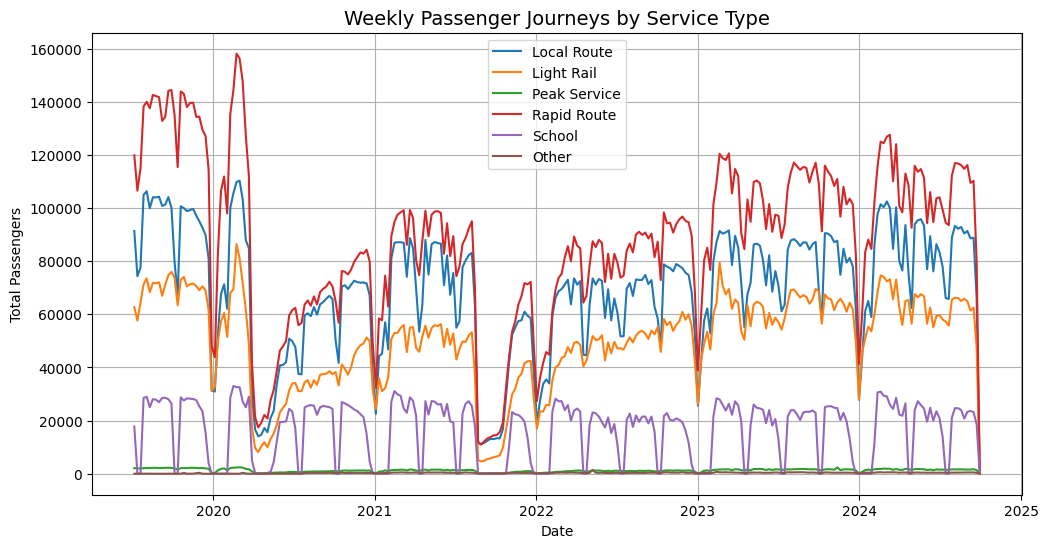

In [121]:
weekly_data = df.resample('W').sum()

# Plot weekly total for each transport mode
plt.figure(figsize=(12,6))
for col in weekly_data.columns:
    plt.plot(weekly_data.index, weekly_data[col], label=col)

plt.title('Weekly Passenger Journeys by Service Type', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Passengers')
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

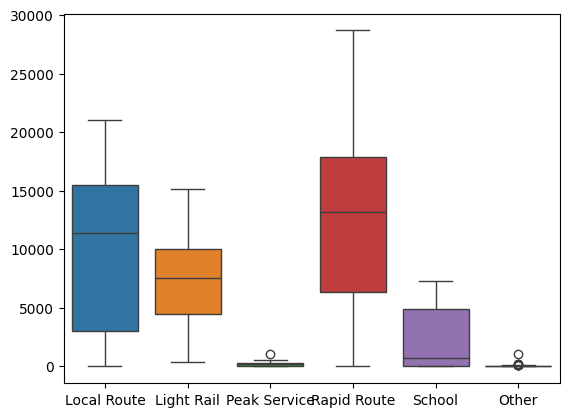

In [57]:
sns.boxplot(data=df)

In [123]:
col = "Peak Service"


Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


outliers = df[(df[col] < lower) | (df[col] > upper)]
display(outliers.head())


,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2023-11-10,16397,11100,1029,19102,4550,81.0


In [59]:
stats_df = pd.DataFrame({
    "Mean": df.mean(),
    "Standard Deviation": df.std(),
    "Coefficient of Variation (%)": (df.std() / df.mean()) * 100
}).round(2)

In [60]:
display(stats_df)

,Mean,Standard Deviation,Coefficient of Variation (%)
Local Route,9921.58,6099.99,61.48
Light Rail,7216.71,3324.01,46.06
Peak Service,179.93,155.96,86.68
Rapid Route,12630.30,6675.83,52.86
School,2364.30,2496.35,105.59
Other,43.39,41.75,96.21


In [61]:
col = "Peak Service"

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier_rows = df[(df[col] < lower) | (df[col] > upper)]

display(outlier_rows)


,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2023-11-10,16397,11100,1029,19102,4550,81.0


In [62]:

comparison_df = df.loc[outlier_rows.index]
display(comparison_df)


,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2023-11-10,16397,11100,1029,19102,4550,81.0


In [63]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,9921.582719,7216.707587,179.925711,12630.298736,2364.301370,43.390411
std,6099.992129,3324.006188,155.962393,6675.828137,2496.352123,41.746882
min,21.000000,375.000000,0.000000,49.000000,0.000000,0.000000
25%,3054.250000,4481.000000,0.000000,6396.000000,0.000000,14.000000
50%,11432.500000,7536.000000,194.000000,13160.000000,687.000000,40.000000
75%,15509.000000,10008.250000,313.000000,17921.000000,4918.500000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [ ]:
    
outlier_date = outliers[col].idxmax()  

window = df.loc[outlier_date - pd.Timedelta(days=3) : outlier_date + pd.Timedelta(days=3)]

print(f"Data around outlier on {outlier_date.date()}:")
print(window)


Data around outlier on 2023-11-10:
            Local Route  Light Rail  Peak Service  Rapid Route  School  Other
Date                                                                         
2023-11-07        16539       10869           316        19710    5143   66.0
2023-11-08        16467       11024           362        19855    4996   76.0
2023-11-09        15411       10537           330        18351    4814   78.0
2023-11-10        16397       11100          1029        19102    4550   81.0
2023-11-11         4154        6325             0         8797       0   17.0
2023-11-12         2788        4381             0         6498       0   24.0
2023-11-13         3406       12088            50         5273    1124   22.0


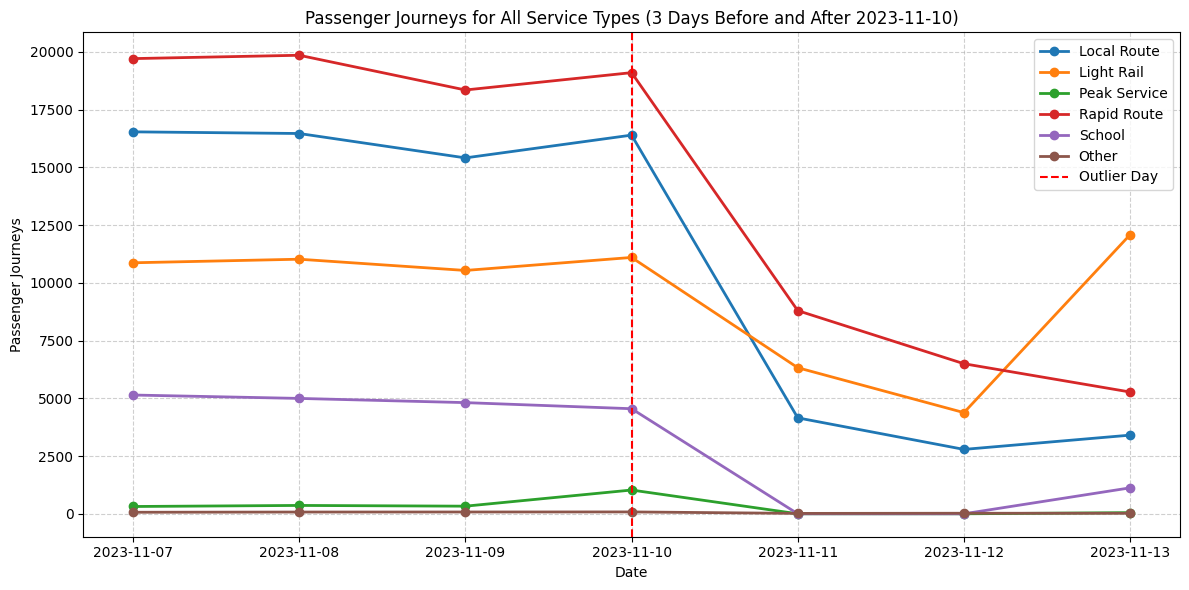

In [82]:
outlier_date = pd.Timestamp('2023-11-10')

# Select 3 days before and after that date
window_data = df.loc[outlier_date - pd.Timedelta(days=3) : outlier_date + pd.Timedelta(days=3)]

# --- Plot all service types ---
cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

plt.figure(figsize=(12, 6))
for col in cols:
    plt.plot(window_data.index, window_data[col], marker='o', linewidth=2, label=col)

# Highlight the outlier date
plt.axvline(outlier_date, color='red', linestyle='--', linewidth=1.5, label='Outlier Day')

plt.title("Passenger Journeys for All Service Types (3 Days Before and After 2023-11-10)")
plt.xlabel("Date")
plt.ylabel("Passenger Journeys")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

An anomalous spike was observed in the ‘Peak Service’ on 10 Nov 2023, while other services remained relatively stable and on the next two day there is very low sone even reching 0 . This indicates an isolated surge in peak-hour travel demand

C:\Users\indir\AppData\Local\Temp\ipykernel_24844\1151817058.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').sum()


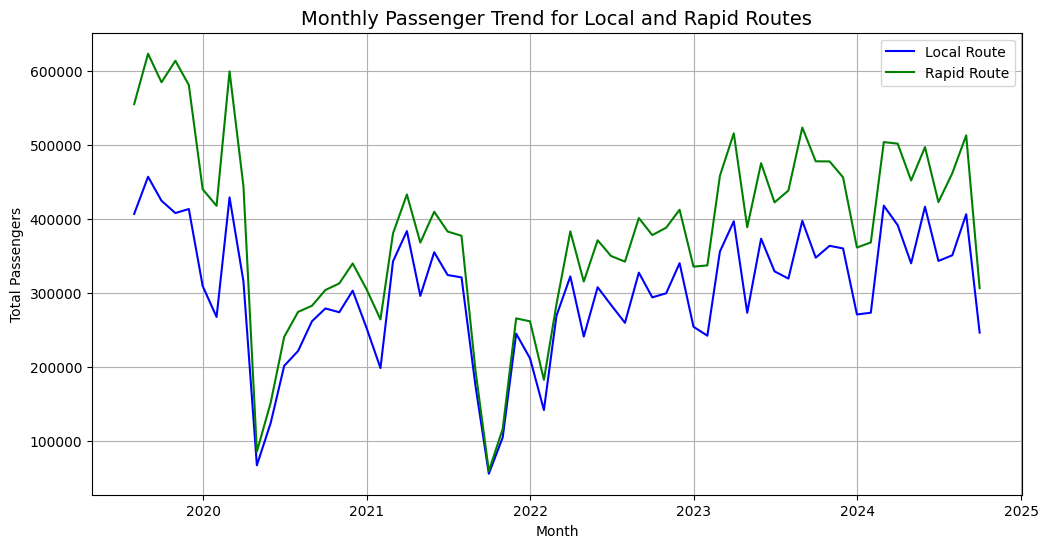

In [122]:
monthly_data = df.resample('M').sum()
plt.figure(figsize=(12,6))
plt.plot(monthly_data.index, monthly_data['Local Route'], label='Local Route', color='blue')
plt.plot(monthly_data.index, monthly_data['Rapid Route'], label='Rapid Route', color='green')
plt.title('Monthly Passenger Trend for Local and Rapid Routes', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.legend()
plt.grid(True)
plt.show()

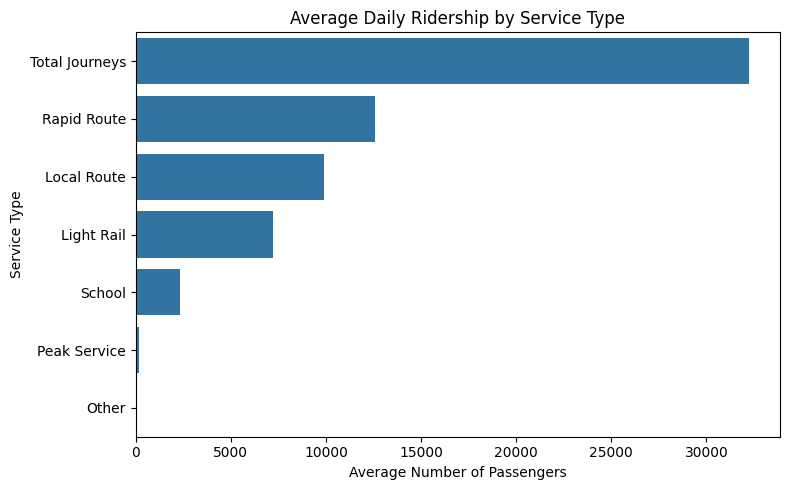

In [132]:
plt.figure(figsize=(8,5))
avg_ridership = df.mean(numeric_only=True).sort_values(ascending=False)
sns.barplot(x=avg_ridership.values, y=avg_ridership.index, )
plt.title("Average Daily Ridership by Service Type")
plt.xlabel("Average Number of Passengers")
plt.ylabel("Service Type")
plt.tight_layout()
plt.show()

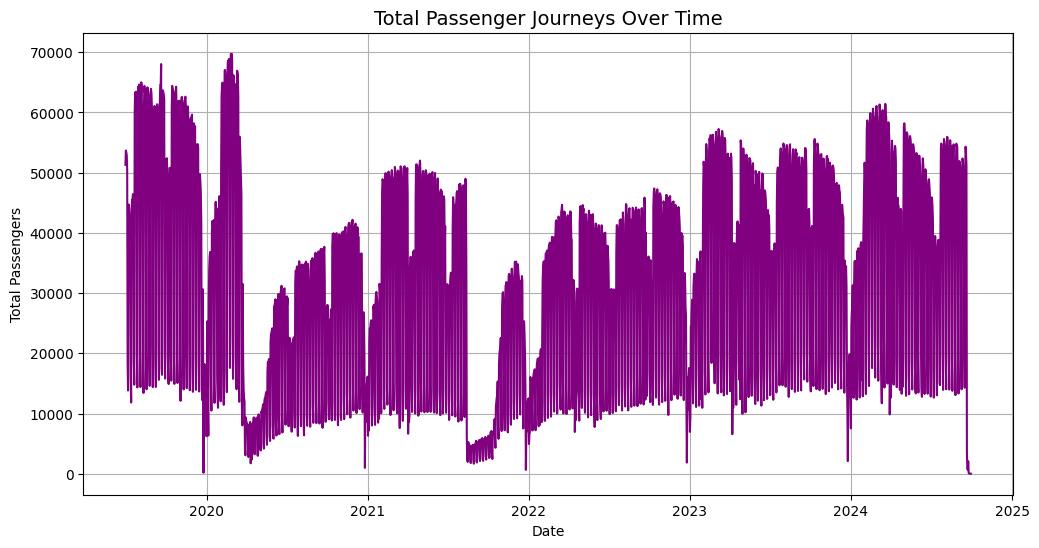

In [125]:
df['Total Journeys'] = df.sum(axis=1)
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Total Journeys'], color='purple')
plt.title('Total Passenger Journeys Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.show()

Forecast of the Local Route, Light Rail, Peak
Service, Rapid Route, School for the next 7 days

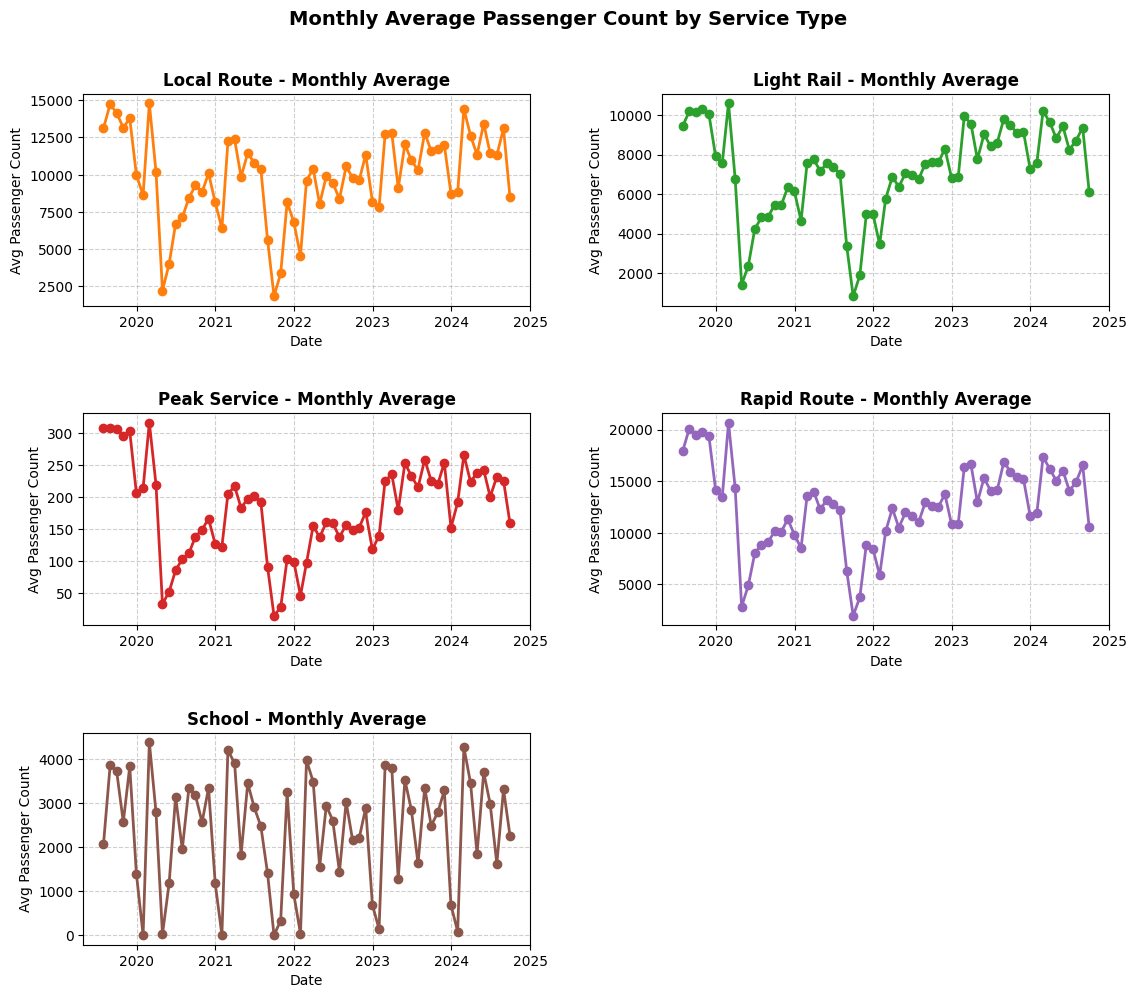

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df.index = pd.to_datetime(df.index)


numeric_df = df.select_dtypes(include='number')


monthly_df = numeric_df.resample('M').mean()


services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']


plt.figure(figsize=(12, 10))
for i, service in enumerate(services, 1):
    plt.subplot(3, 2, i)
    
    if service in monthly_df.columns:
        plt.plot(
            monthly_df.index, 
            monthly_df[service], 
            marker='o', 
            linestyle='-', 
            color=plt.cm.tab10(i % 10), 
            linewidth=2
        )
        plt.title(f"{service} - Monthly Average", fontsize=12, fontweight='bold')
        plt.xlabel("Date", fontsize=10)
        plt.ylabel("Avg Passenger Count", fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.6)
    else:
        plt.text(0.5, 0.5, f"{service} not found", ha='center', va='center', fontsize=12, color='red')
    
    plt.tight_layout(pad=3)


plt.suptitle("Monthly Average Passenger Count by Service Type", fontsize=14, fontweight='bold', y=1.02)

plt.show()


In [93]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


 Augmented Dickey-Fuller Test for: Local Route
ADF Test Statistic : -4.580035661257344
p-value : 0.0001405680369891524
#Lags Used : 21
Number of Observations Used : 1896
 Stationary (reject H₀, no differencing needed)


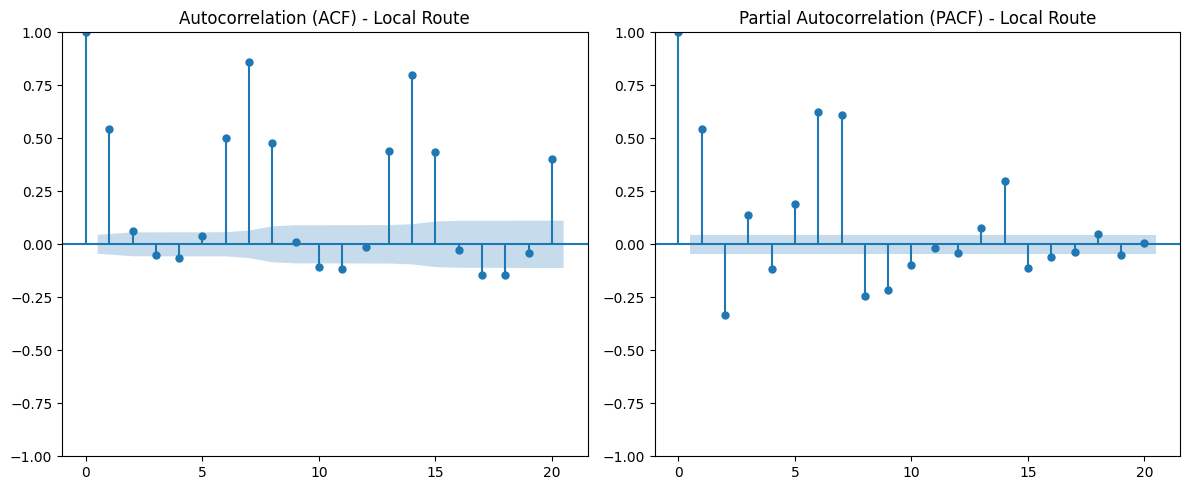


 Augmented Dickey-Fuller Test for: Light Rail
ADF Test Statistic : -3.4960587014034448
p-value : 0.008088893778396278
#Lags Used : 26
Number of Observations Used : 1891
 Stationary (reject H₀, no differencing needed)


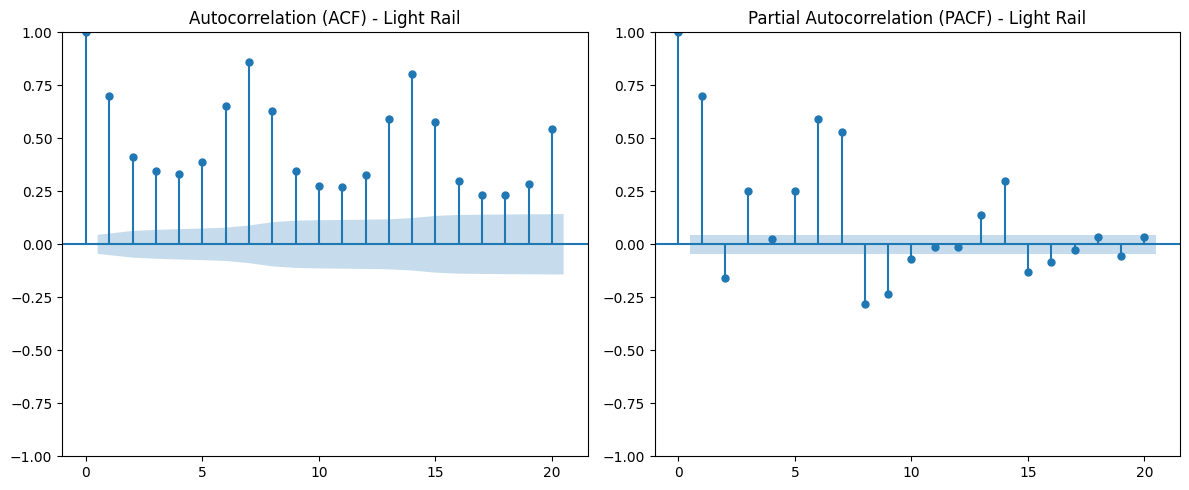


 Augmented Dickey-Fuller Test for: Peak Service
ADF Test Statistic : -3.870723309372974
p-value : 0.002261189892356148
#Lags Used : 21
Number of Observations Used : 1896
 Stationary (reject H₀, no differencing needed)


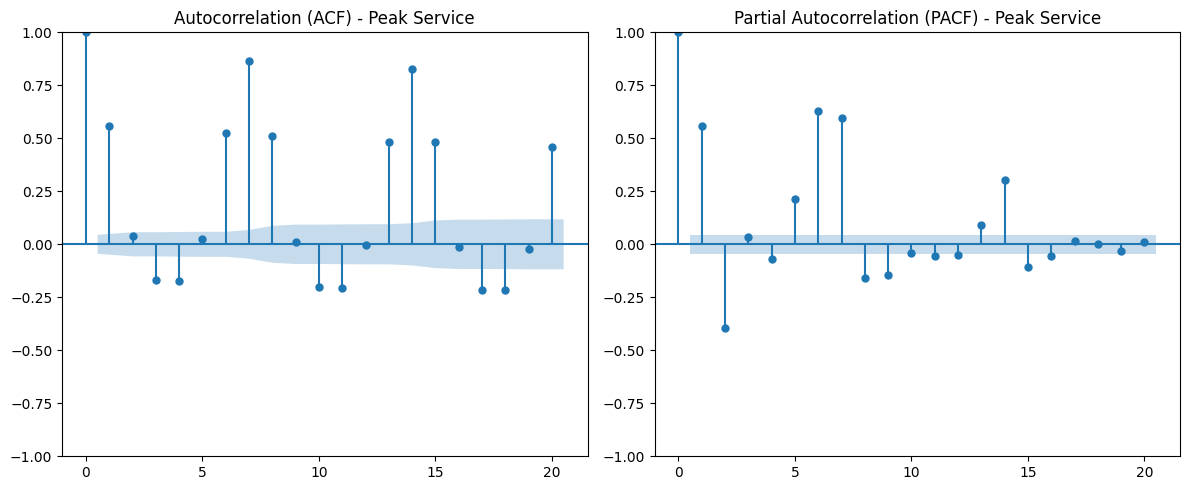


 Augmented Dickey-Fuller Test for: Rapid Route
ADF Test Statistic : -3.8281016528348837
p-value : 0.0026325357298383027
#Lags Used : 21
Number of Observations Used : 1896
 Stationary (reject H₀, no differencing needed)


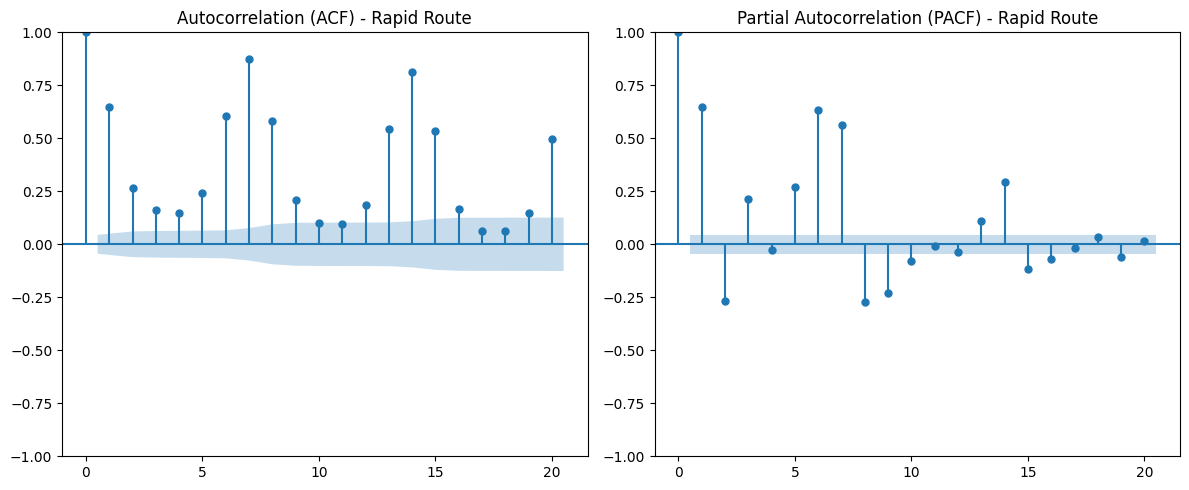


 Augmented Dickey-Fuller Test for: School
ADF Test Statistic : -7.1339119092075185
p-value : 3.4605568058212554e-10
#Lags Used : 24
Number of Observations Used : 1893
 Stationary (reject H₀, no differencing needed)


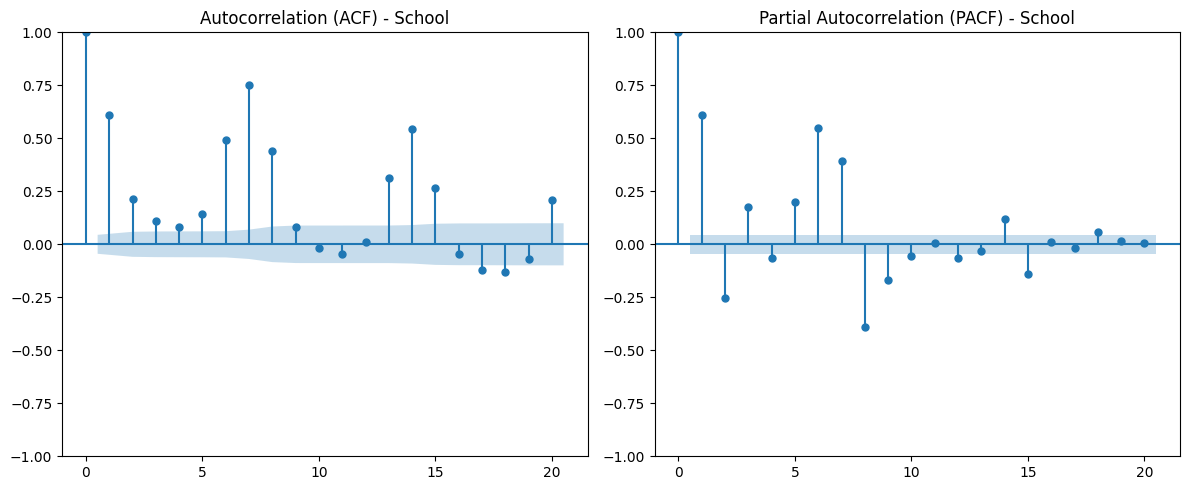

In [133]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df.sort_index(inplace=True)

series = df['Local Route'].dropna()


services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']


def adfuller_test(series, column_name):
    print(f"\n Augmented Dickey-Fuller Test for: {column_name}")
    result = adfuller(series.dropna())
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result[:4], labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print(" Stationary (reject H₀, no differencing needed)")
    else:
        print(" Non-stationary (fail to reject H₀, differencing recommended)")


for service in services:
    series = df[service].dropna()
    
  
    adfuller_test(series, service)
    
   
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    plot_acf(series, ax=axes[0], lags=20)
    axes[0].set_title(f"Autocorrelation (ACF) - {service}")
    
    plot_pacf(series, ax=axes[1], lags=20, method='ywm')
    axes[1].set_title(f"Partial Autocorrelation (PACF) - {service}")
    
    plt.tight_layout()
    plt.show()


As every attribute has a p value less than 0.05 we take the p as 1 for all the value 


🔹 Forecasting for: Local Route


c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


               Forecast     Lower CI      Upper CI
Date                                              
2024-09-30  4884.210725 -5039.934030  14808.355480
2024-10-01  7120.421127 -3930.486627  18171.328880
2024-10-02  8144.468059 -3195.276884  19484.213002
2024-10-03  8613.418619 -2822.680171  20049.517408
2024-10-04  8828.169154 -2651.151592  20307.489901
2024-10-05  8926.511702 -2578.777075  20431.800478
2024-10-06  8971.546544 -2553.269834  20496.362923


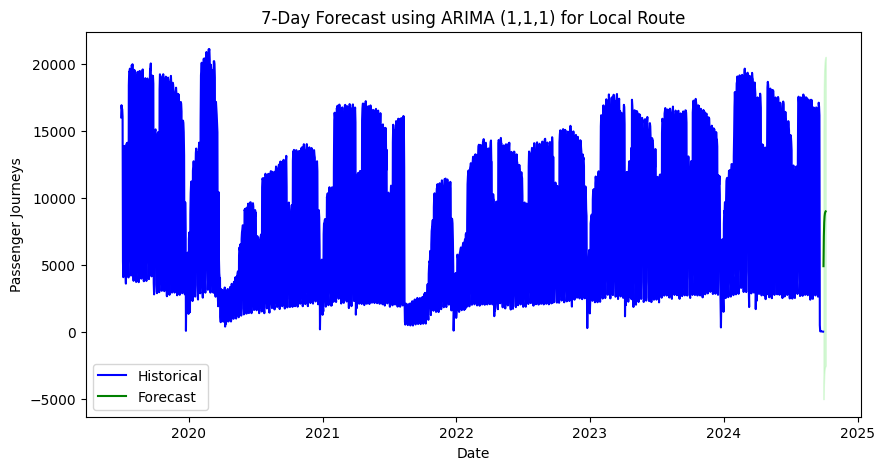


🔹 Forecasting for: Light Rail


c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


               Forecast     Lower CI     Upper CI
Date                                             
2024-09-30  2472.728680 -1975.989166  6921.446526
2024-10-01  3585.285167 -1426.429876  8597.000211
2024-10-02  4085.858460 -1103.099012  9274.815932
2024-10-03  4311.081740  -957.277625  9579.441105
2024-10-04  4412.416603  -904.405218  9729.238425
2024-10-05  4458.010266  -895.829416  9811.849949
2024-10-06  4478.524254  -907.619416  9864.667924


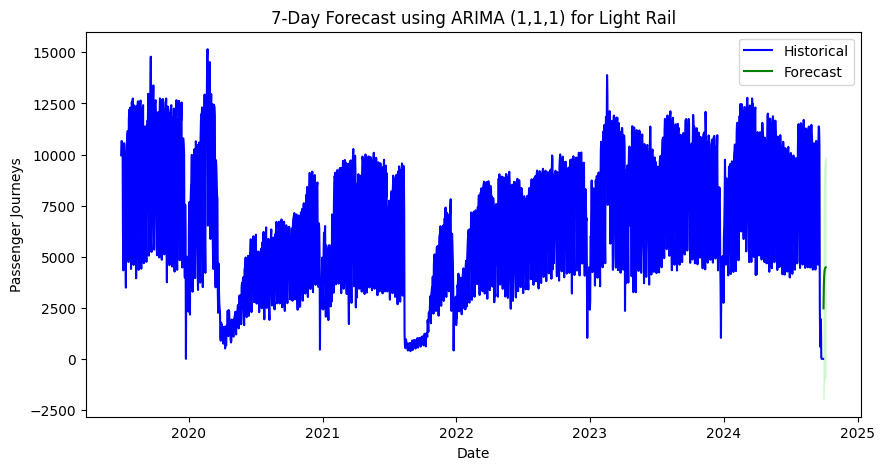


🔹 Forecasting for: Peak Service


c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


              Forecast    Lower CI    Upper CI
Date                                          
2024-09-30   95.266760 -154.818574  345.352093
2024-10-01  140.850671 -138.758580  420.459923
2024-10-02  162.661983 -124.455001  449.778968
2024-10-03  173.098414 -116.342363  462.539191
2024-10-04  178.092111 -112.253646  468.437868
2024-10-05  180.481530 -110.324347  471.287408
2024-10-06  181.624837 -109.481213  472.730887


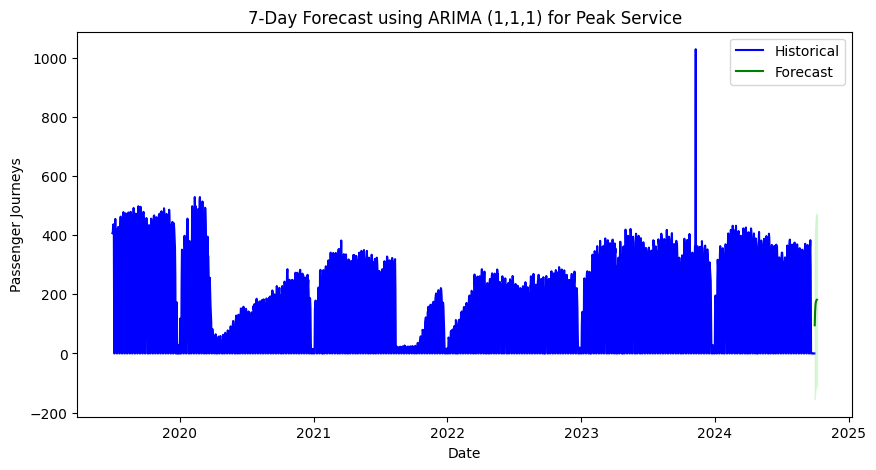


🔹 Forecasting for: Rapid Route


c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


               Forecast     Lower CI      Upper CI
Date                                              
2024-09-30  4881.739155 -4828.153368  14591.631677
2024-10-01  7187.972576 -3771.849394  18147.794547
2024-10-02  8278.154369 -3057.737516  19614.046253
2024-10-03  8793.495239 -2694.255323  20281.245801
2024-10-04  9037.102512 -2532.401920  20606.606944
2024-10-05  9152.258337 -2473.463984  20777.980659
2024-10-06  9206.693757 -2464.805966  20878.193481


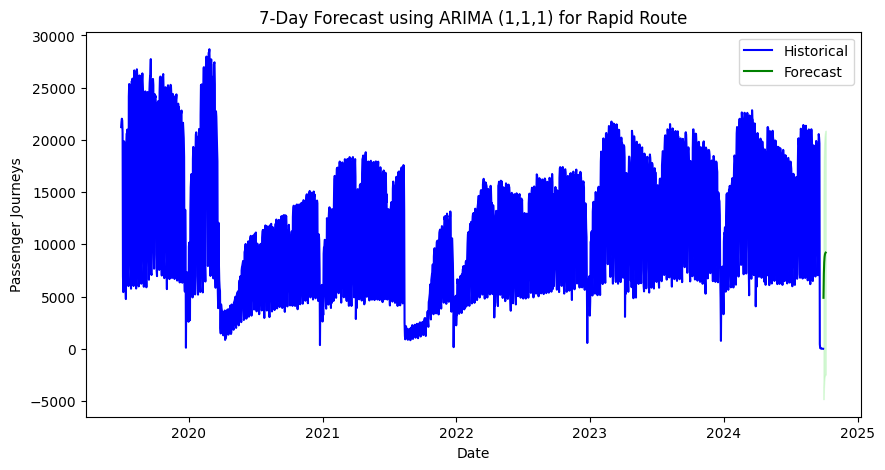


🔹 Forecasting for: School


c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\indir\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


               Forecast     Lower CI     Upper CI
Date                                             
2024-09-30   916.334021 -2961.526971  4794.195012
2024-10-01  1475.160894 -3067.990568  6018.312355
2024-10-02  1815.961810 -2951.607206  6583.530827
2024-10-03  2023.799462 -2824.952963  6872.551887
2024-10-04  2150.549383 -2728.274942  7029.373708
2024-10-05  2227.847901 -2662.249205  7117.945007
2024-10-06  2274.988450 -2619.377267  7169.354168


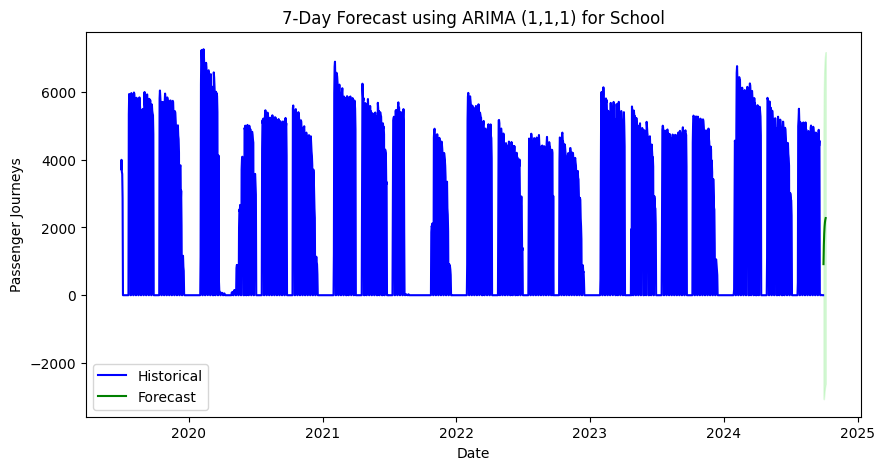